In [13]:
%pip install fastf1
import fastf1
import pandas as pd


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
def get_silverstone_results(start_year, end_year):
    all_results = []
    for year in range(start_year, end_year + 1):
        try:
            session = fastf1.get_session(year, 'Silverstone', 'R')
            session.load()
            results = session.results
            results['Year'] = year
            all_results.append(results)
            results['Position'] = results['Position'].astype(int)
        except Exception as e:
            print(f"Could not load data for year {year}: {e}")
    results_df = pd.concat(all_results, ignore_index=True)
    return results_df[(results_df['Status'] == 'Finished')]

    

In [15]:
def pitstop_analysis(start_year, end_year):
    pitstop_data = []
    for year in range(start_year, end_year + 1):
        try:
            session = fastf1.get_session(year, 'Silverstone', 'R')
            session.load()
            lap_data = session.laps
            lap_data[lap_data['PitInTime'].notna()] 
            #lap_data[unique]
            lap_data['PitStopCount'] = lap_data.groupby('Driver')['PitInTime'].transform('count')
            lap_data = lap_data[lap_data['PitStopCount'] > 0]
            lap_data['AveragePitStopDuration'] = lap_data.groupby('Driver')['PitInTime'].transform('mean')
            lap_data['Year'] = year
            lap_data = lap_data.rename(columns={'Driver': 'Abbreviation'})
            lap_data[['Abbreviation', 'PitStopCount', 'AveragePitStopDuration']].drop_duplicates()      
            pitstop_data.append(lap_data[['Abbreviation', 'PitStopCount', 'AveragePitStopDuration', 'Year']].drop_duplicates())
        except Exception as e:
            print(f"Could not load data for year {year}: {e}")
    pitstop_df = pd.concat(pitstop_data, ignore_index=True)
    return pitstop_df

In [16]:
df_pitstop = pitstop_analysis(2018, 2024)
df_general = get_silverstone_results(2018, 2024)

core           INFO 	Loading data for British Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  2: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 5 completed the race distance 00:00.014000 before the recorded end of the session.
core           INFO 	Finished loading data for 2

In [17]:
final_df = pd.merge(df_general, df_pitstop, on=['Abbreviation', 'Year'], how='left')
final_df

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Q1,Q2,Q3,Time,Status,Points,Laps,Year,PitStopCount,AveragePitStopDuration
0,5,S VETTEL,VET,vettel,Ferrari,DC0000,ferrari,Sebastian,Vettel,Sebastian Vettel,...,NaT,NaT,NaT,0 days 01:27:29.784000,Finished,25.0,52.0,2018,2,0 days 00:48:50.431500
1,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,...,NaT,NaT,NaT,0 days 00:00:02.264000,Finished,18.0,52.0,2018,1,0 days 00:46:37.656000
2,7,K RAIKKONEN,RAI,raikkonen,Ferrari,DC0000,ferrari,Kimi,Räikkönen,Kimi Räikkönen,...,NaT,NaT,NaT,0 days 00:00:03.652000,Finished,15.0,52.0,2018,2,0 days 00:43:39.819500
3,77,V BOTTAS,BOT,bottas,Mercedes,00D2BE,mercedes,Valtteri,Bottas,Valtteri Bottas,...,NaT,NaT,NaT,0 days 00:00:08.883000,Finished,12.0,52.0,2018,1,0 days 00:40:03.335000
4,3,D RICCIARDO,RIC,ricciardo,Red Bull Racing,1E41FF,red_bull,Daniel,Ricciardo,Daniel Ricciardo,...,NaT,NaT,NaT,0 days 00:00:09.500000,Finished,10.0,52.0,2018,2,0 days 00:45:00.863500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,14,F ALONSO,ALO,alonso,Aston Martin,229971,aston_martin,Fernando,Alonso,Fernando Alonso,...,NaT,NaT,NaT,0 days 00:01:03.577000,Finished,4.0,52.0,2024,2,0 days 01:50:30.759000
91,23,A ALBON,ALB,albon,Williams,64C4FF,williams,Alexander,Albon,Alexander Albon,...,NaT,NaT,NaT,0 days 00:01:08.387000,Finished,2.0,52.0,2024,2,0 days 01:50:35.682500
92,22,Y TSUNODA,TSU,tsunoda,RB,6692FF,rb,Yuki,Tsunoda,Yuki Tsunoda,...,NaT,NaT,NaT,0 days 00:01:19.303000,Finished,1.0,52.0,2024,2,0 days 01:50:33.752500
93,2,L SARGEANT,SAR,sargeant,Williams,64C4FF,williams,Logan,Sargeant,Logan Sargeant,...,NaT,NaT,NaT,0 days 00:01:28.960000,Finished,0.0,52.0,2024,2,0 days 01:50:46.114000


In [23]:
df_analysis = final_df[['Position','GridPosition','Time','PitStopCount','AveragePitStopDuration']].copy()
df_analysis['AveragePitStopDuration'] = pd.to_timedelta(df_analysis['AveragePitStopDuration']).dt.total_seconds()
df_analysis['PositionBin'] = pd.cut(df_analysis['Position'], bins=[-1, 3, 10, 20], labels=['T-3', 'T4-T10', 'Other'])
df_analysis = df_analysis.drop(columns=['Position', 'Time'])
df_analysis

,GridPosition,PitStopCount,AveragePitStopDuration,PositionBin
0,2.0,2,2930.4315,T-3
1,1.0,1,2797.6560,T-3
2,3.0,2,2619.8195,T-3
3,4.0,1,2403.3350,T4-T10
4,6.0,2,2700.8635,T4-T10
...,...,...,...,...
90,10.0,2,6630.7590,T4-T10
91,9.0,2,6635.6825,T4-T10
92,13.0,2,6633.7525,T4-T10
93,12.0,2,6646.1140,Other


In [ ]:
#run random forest classifier to predict position
%pip install scikit-learn
%pip install imbalanced-learn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Prepare features and target
X = df_analysis[['GridPosition', 'PitStopCount', 'AveragePitStopDuration']].dropna()
y = df_analysis['PositionBin'].loc[X.index]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE oversampling
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train Random Forest
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_res, y_res)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")




[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
              precision    recall  f1-score   support

       Other       1.00      0.20      0.33         5
         T-3       0.56      1.00      0.71         5
      T4-T10       0.56      0.56      0.56         9

    accuracy                           0.58        19
   macro avg       0.70      0.59      0.53        19
weighted avg       0.67      0.58      0.54        19

Accuracy: 0.58


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


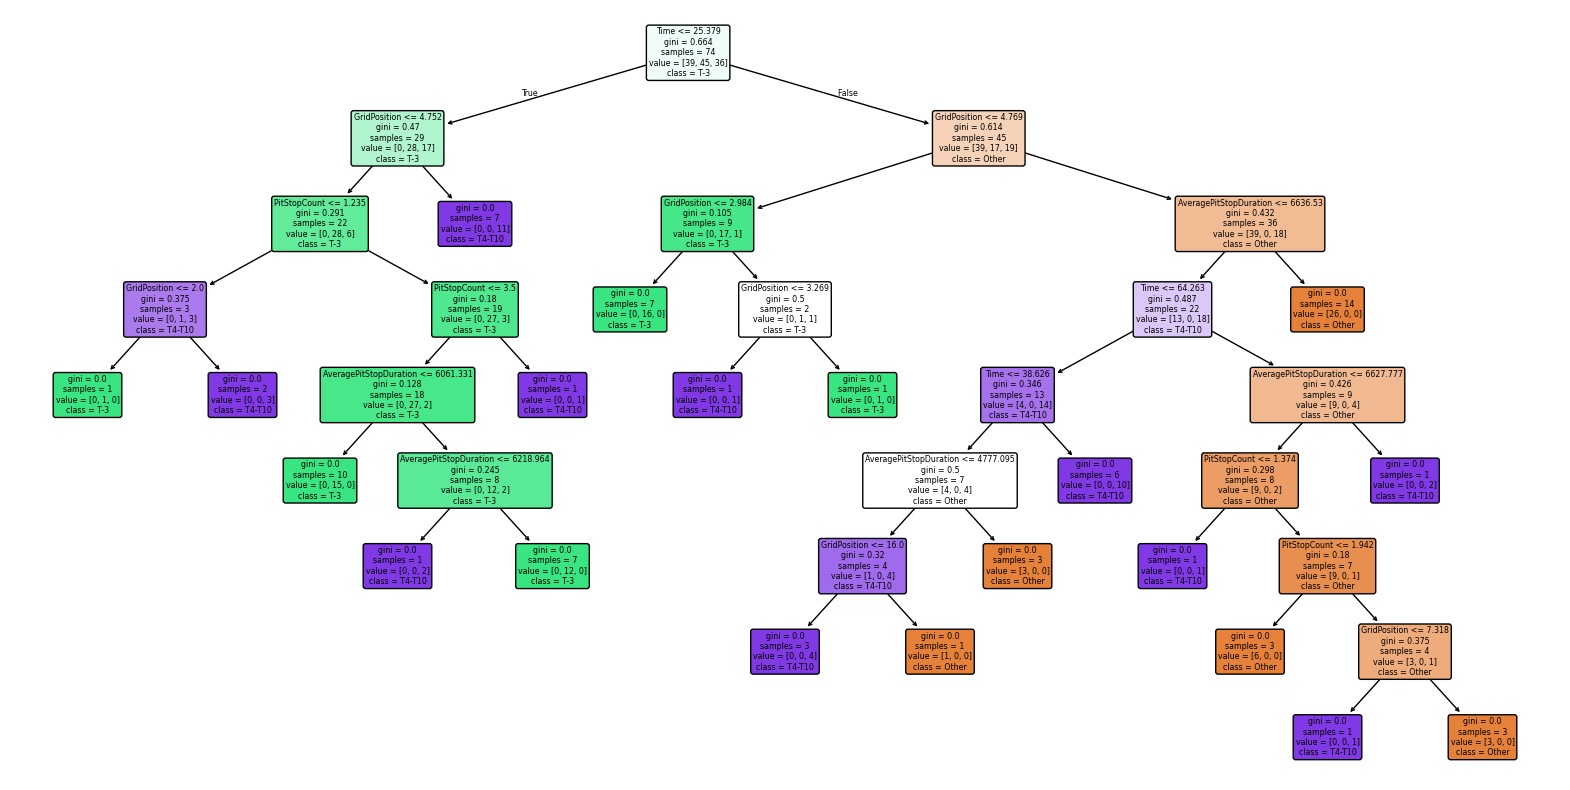

In [20]:
from sklearn.tree import export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt

# Pick the first tree
single_tree = model.estimators_[0]

# Plot it
plt.figure(figsize=(20,10))
tree.plot_tree(single_tree, 
               feature_names=X.columns, 
               class_names=model.classes_, 
               filled=True, 
               rounded=True)
plt.show()

